In [1]:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.collections import PatchCollection
import scipy.spatial, scipy.linalg
import scipy.sparse.linalg
from scipy.misc import logsumexp
from scipy.cluster.hierarchy import linkage, dendrogram
import itertools
import sheet3 as imp
%matplotlib inline

In [2]:
def nomdis(x,mu, sigma):
    return np.exp(-((x-mu)**2)/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

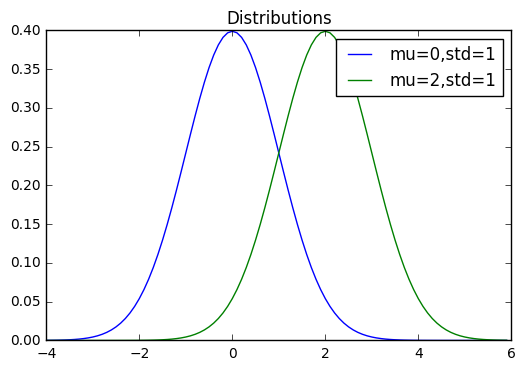

In [3]:
pp1 = nomdis(np.arange(-4,6,0.1),0,1)
pp2 = nomdis(np.arange(-4,6,0.1),2,1)
plt.plot(np.arange(-4,6,0.1),nomdis(np.arange(-4,6,0.1),0,1),label='mu=0,std=1')
plt.plot(np.arange(-4,6,0.1),nomdis(np.arange(-4,6,0.1),2,1),label='mu=2,std=1')
plt.legend()
plt.title("Distributions")


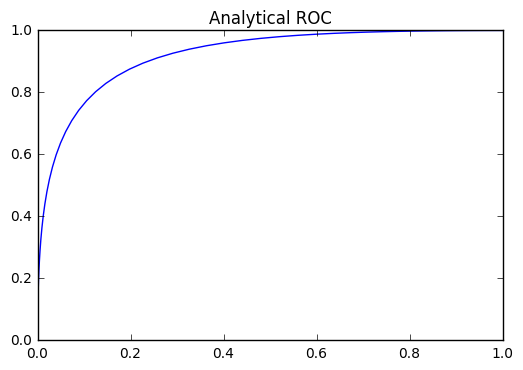

In [4]:
s1 = pp1.sum()
s2 = pp2.sum()
c1 = np.cumsum(pp1)/np.cumsum(pp1)[-1]
c2 = np.cumsum(pp2)/np.cumsum(pp2)[-1]
fp = 1-c1
tp =1-c2
plt.plot(fp,tp)
plt.title("Analytical ROC")

In [5]:
print(tp)
print(fp)

[  9.99999999e-01   9.99999998e-01   9.99999996e-01   9.99999993e-01
   9.99999987e-01   9.99999976e-01   9.99999957e-01   9.99999926e-01
   9.99999872e-01   9.99999782e-01   9.99999634e-01   9.99999390e-01
   9.99998993e-01   9.99998356e-01   9.99997342e-01   9.99995744e-01
   9.99993250e-01   9.99989396e-01   9.99983501e-01   9.99974575e-01
   9.99961191e-01   9.99941325e-01   9.99912129e-01   9.99869649e-01
   9.99808457e-01   9.99721185e-01   9.99597959e-01   9.99425695e-01
   9.99187277e-01   9.98860582e-01   9.98417380e-01   9.97822104e-01
   9.97030528e-01   9.95988394e-01   9.94630045e-01   9.92877146e-01
   9.90637606e-01   9.87804793e-01   9.84257196e-01   9.79858666e-01
   9.74459359e-01   9.67897523e-01   9.60002201e-01   9.50596928e-01
   9.39504414e-01   9.26552152e-01   9.11578824e-01   8.94441300e-01
   8.75021941e-01   8.53235878e-01   8.29037866e-01   8.02428309e-01
   7.73458029e-01   7.42231424e-01   7.08907670e-01   6.73699771e-01
   6.36871328e-01   5.98731066e-01

In [7]:
def ROCcul(P):
    f= np.arange(-4,6,0.1)#np.arange(11)-4
    ptrue = np.array(P[:,1])
    ttp = ptrue.sum()
    tfp = len(ptrue)-ttp
    roc = np.zeros((2,len(f)))
    for i in range(len(f)):
        pred =np.zeros(len(P))
        pred[np.where(P[:,0]>f[i])]=1
        roc[1][i] = ptrue[np.where(pred==1)].sum()/ttp
        roc[0][i] = pred[np.where(ptrue==0)].sum()/tfp
    ROC=roc[:,np.argsort(roc[0])]
    return ROC

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


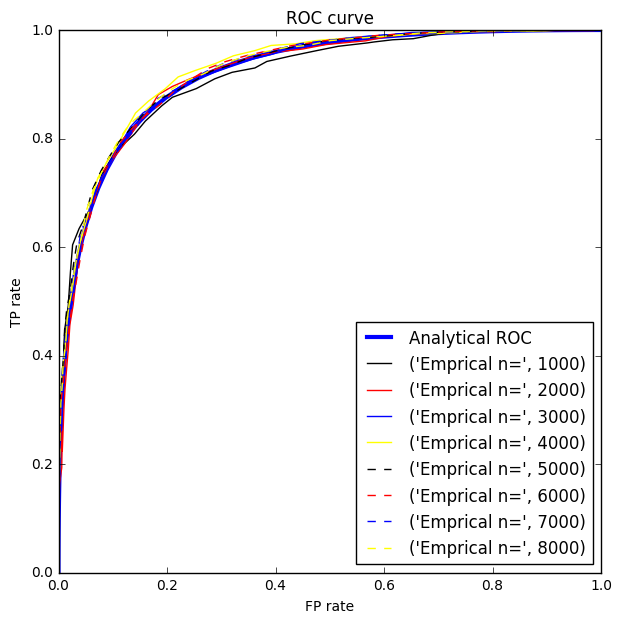

In [9]:
N = np.arange(1000,9000,1000)
plt.figure(figsize=(7,7))
plt.plot(fp,tp,label="Analytical ROC",linewidth=3.0)
cl = ['black','red','blue','yellow','black','red','blue','yellow']
line = ['solid','solid','solid','solid','dashed','dashed','dashed','dashed']
ite = 0
for n in N:
    p1 = np.random.randn(n/2)
    p2 = np.random.randn(n/2) +2
    P1 = np.append(p1.reshape(1,len(p1)),np.zeros((1,len(p1))),0)
    P2 = np.append(p2.reshape(1,len(p2)),np.ones((1,len(p2))),0)
    P = np.append(P1,P2,1)
    P =P.T[np.argsort(P[0])]
    ptrue = np.array(P[:,1])
    sroc = ROCcul(P)
    plt.plot(sroc[0],sroc[1], label=("Emprical n=",n),color=cl[ite],linestyle=line[ite])
    ite = ite+1
plt.legend(loc="lower right")
plt.xlabel("FP rate")
plt.ylabel("TP rate")
plt.title("ROC curve")